### Решить численно краевую задачу Дирихле для уравнения Пуассона в односвязной области итерационным методом.

In [1]:
import numpy as np
import copy
import math
import matplotlib.pyplot as plt
from matplotlib import cm

Тестовый пример

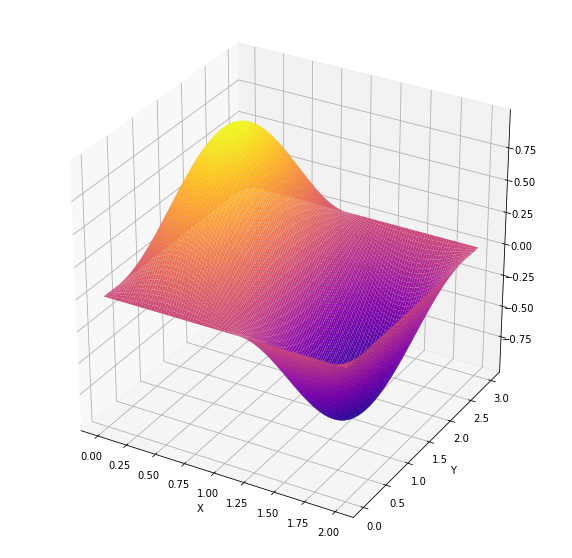

In [2]:
u = lambda x, y: np.sin((2*math.pi*x)/2)*np.sin((np.pi*y)/3)

fig = plt.figure(figsize = (10, 10))# создаём полотно для рисунка
ax = fig.add_subplot(1, 1, 1, projection = '3d') # создаём рисунок пространства с поверхностью

xval = np.linspace(0, 2, 100)
yval = np.linspace(0, 3, 100)
x, y = np.meshgrid(xval, yval)
z = u(x, y)
plt.xlabel("X")
plt.ylabel("Y")
surf = ax.plot_surface(x, y, z, rstride = 1,cstride = 1,cmap = cm.plasma)

### Метод сопряженных градиентов

In [3]:
# проверяем,является ли матрица А симметр. положительной определенной 
def check_positive_definiteness(A,m):  
    ran = 1
    fl = True 
    while fl and (ran <= m): # m - размерность
        B=np.zeros((ran, ran))
        for i in range(ran):
            for j in range(ran):
                B[i,j] = A[i,j]
        if np.linalg.det(B) < 0:
            fl = False
        ran+=1
    return fl

In [4]:
# вычисление евклидовой нормы вектора
def ev_norma(M):
    x = 0
    for i in range(len(M)):
            x += M[i]**2
    return np.sqrt(x)

In [5]:
def conjugate_gradient_method(A1, b1):
        x0 = np.array([1]*len(b1))
        k0 = b1 - A1.dot(x0)  # k - вектор невязки 
        p0 = k0               # p - направление спуска
        n=0                   # число итераций
        eps = 10**(-4)

        fl = True
        k = np.zeros(len(b1)+1)
        p = np.zeros(len(b1)+1)
        while (fl): 
            alfa = (np.dot(k0,k0))/(np.dot(A1.dot(p0),p0))
            x = x0 + alfa * p0
            k = k0 - alfa * A1.dot(p0)
            betta = (np.dot(k,k))/(np.dot(k0,k0))
            p = k + betta * p0

            if not(ev_norma(k)/ev_norma(A1.dot(x0) - b) <= eps):
                x0 = x
                p0 = p
                k0 = k
                n+=1
            else:
                fl = False
        return x, n 

In [6]:
a = 2
b = 3

def Func(x,y):
    return -((np.pi**2)/b**2 + (np.pi**2))*np.sin((2*math.pi*x)/2)*np.sin((np.pi*y)/3)

def U0_x(x):
    return 0
def Ub_x(x):
    return 0
def U0_y(x):
    return 0
def Ub_y(x):
    return 0

In [7]:
def approximate_solution(x0, xn, hx, hy, f, U0_x, Ub_x, U0_y, Ub_y):
        nx = int(x0/hx)
        ny = int(xn/hy)
        n = (nx-1)*(ny-1)
        
        x = np.linspace(0, x0, nx+1) 
        y = np.linspace(0, xn, ny+1)
       # создаем матрицу A
        
        A = np.zeros((n,n))
        for i in range(n):     # главная и 1 под и над диагонали
            A[i,i] = -2/(hx**2) -2/(hy**2)
            if((i+1) % (nx-1) != 0):
                A[i][i+1] = 1/hx**2 
            if(i % (nx-1) != 0): 
                A[i][i-1] = 1/hx**2
                
        for i in range(0, n-nx + 1):  #nx-1 над и под диагональ
            A[i][i + nx - 1] = 1/hy**2 
            A[i + nx - 1][i] = 1/hy**2
        
        # создаем вектор b    
        b = np.zeros(n)
        for i in range(0, n):
            b[i] = f(x[i % (nx - 1) + 1], y[i // (nx - 1) + 1])
            
        for i in range(1, nx):
            b[i-1] += -U0_x(x[i])/hx**2
            
        for i in range(n - (nx-1)-1, n):
            b[i-1] += -Ub_x(x[i % (nx - 1)])/hx**2
            
        for i in range(1, n, nx-1):
            b[i-1] += -U0_y(y[i // (nx - 1) + 1])/hy**2
            
        for i in range(nx-1, n, nx-1):
            b[i-1] += -Ub_y(y[i // (nx - 1) + 1])/hy**2

        # получаем решение Z
        zs = conjugate_gradient_method(A, b)[0]
        print("кол-во =",conjugate_gradient_method(A, b)[1])

        z = np.zeros(((ny-1) + 2, (nx-1) + 2))
        zs = zs.reshape(((ny-1), (nx-1))) 
        
        for i in range(1, (ny-1)+1):
            for j in range(1, (nx-1)+1): 
                z[i][j] = zs[i-1][j-1]
                
        for i in range(0, nx): 
            z[0][i] = U0_x(x[i])
            z[ny][i] = Ub_x(x[i])
            
        for i in range(0, ny): 
            z[i][0] = U0_y(y[i]) 
            z[i][nx] = Ub_y(y[i]) 

        return x, y, z

кол-во = 102


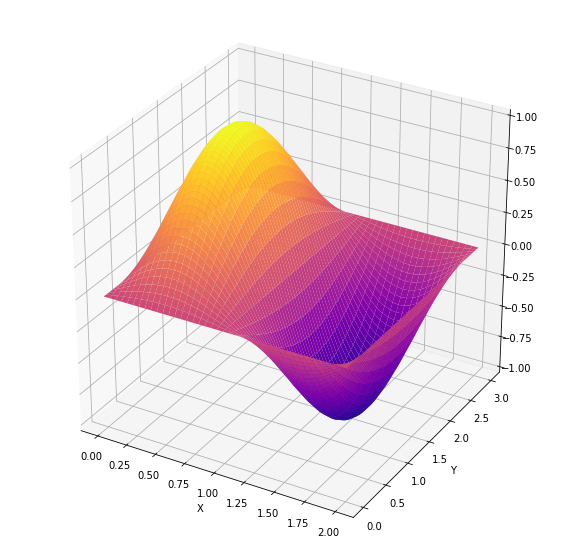

In [8]:
x,y,z = approximate_solution(a, b, 0.05, 0.05, Func, U0_x, Ub_x, U0_y, Ub_y) 

(x1, y1) = np.meshgrid(x, y)
fig = plt.figure(figsize = (10, 10))# создаём полотно для рисунка
ax = fig.add_subplot(1, 1, 1, projection = '3d')

plt.xlabel("X")
plt.ylabel("Y")
surf = ax.plot_surface(x1, y1, z, rstride = 1,cstride = 1,cmap = cm.plasma)


In [9]:
def runge(Uh, U2h):
    return np.amax(abs(Uh[:: 2, :: 2] - U2h)/3)

In [10]:
hy = 0.1  # берем в качестве начального шага
hx = 0.1
eps = 0.001 # заданная точность
M = 1000

while (M > eps):
    y_ans_2h = approximate_solution(a, b, hx, hy, Func, U0_x, Ub_x, U0_y, Ub_y)[2] 
    x,c,v = approximate_solution(a, b, hx, hy, Func, U0_x, Ub_x, U0_y, Ub_y)
    hx=hx/2
    hy=hy/2
    y_ans_h = approximate_solution(a, b, hx, hy, Func, U0_x, Ub_x, U0_y, Ub_y)[2]
    M = runge(y_ans_h,y_ans_2h)

print("Шаг при погрешности по Рунге",eps," = ",hx,hy)

кол-во = 49
кол-во = 49
кол-во = 102
кол-во = 102
кол-во = 102
кол-во = 210
Шаг при погрешности по Рунге 0.001  =  0.025 0.025


погрешность

кол-во = 210


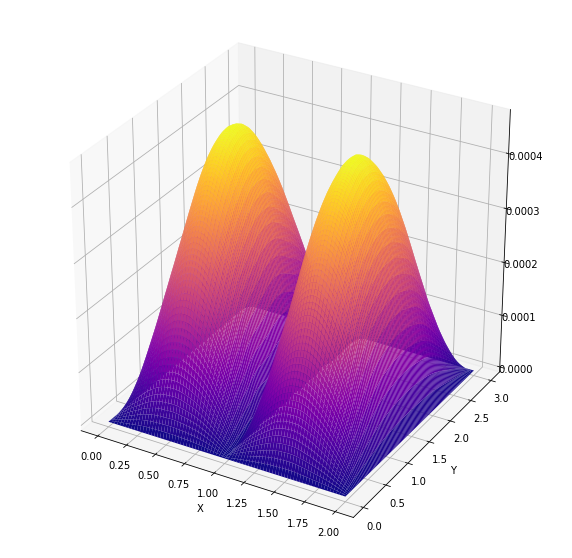

In [11]:
x,y,z = approximate_solution(a, b, hx, hy, Func, U0_x, Ub_x, U0_y, Ub_y) 
(x1, y1) = np.meshgrid(x, y)

fig = plt.figure(figsize = (10, 10))# создаём полотно для рисунка
ax = fig.add_subplot(1, 1, 1, projection = '3d')

plt.xlabel("X")
plt.ylabel("Y")
surf = ax.plot_surface(x1, y1, abs(z - u(x1,y1)), rstride = 1,cstride = 1,cmap = cm.plasma)